In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [3]:
# import precprocessed data
train = pd.read_csv("trainPreprocessed.csv")
test = pd.read_csv("testPreprocessed.csv")

In [4]:
print(train.shape,test.shape)

(354324, 300) (236216, 299)


In [5]:
train.columns

Index(['TransactionID', 'TransactionDT', 'card1', 'card2', 'card3', 'card5',
       'card6', 'addr1', 'addr2', 'C1',
       ...
       'ProductCD_S', 'ProductCD_W', 'card4_american express',
       'card4_discover', 'card4_mastercard', 'card4_visa', 'M4_M0', 'M4_M1',
       'M4_M2', 'isFraud'],
      dtype='object', length=300)

In [ ]:
##remove transactionID from data as it is a unique feature

In [6]:
k = test['TransactionID']

In [7]:
del train['TransactionID']
del test['TransactionID']

In [ ]:
## train and test split using stratify as data is highly imbalanced

In [8]:
y_train = train['isFraud'].copy().values

In [9]:
del train['isFraud']

In [10]:
X_train = train.copy().values

In [11]:
X_test = test.copy().values

In [12]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.33,stratify = y_train)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(237397, 298) (116927, 298) (237397,) (116927,)


In [ ]:
## training model using LGBM using the folowing parameters obtained using random search cv

In [13]:

model = lgb.LGBMClassifier(objective = 'binary',
        boosting_type = 'gbdt',
        n_estimators = 5000,
        learning_rate = 0.02, 
        num_leaves = 50,
        min_data_in_leaf = 125, 
        bagging_fraction = 0.901,
        max_depth = 13, 
        reg_alpha = 2.5,
        reg_lambda = 2.5,
        min_split_gain = 0.0001,
        min_child_weight = 25,
        feature_fraction = 0.5, 
        silent = -1,
        verbose = -1,
        class_weight='balanced',
        n_jobs = -1)
model.fit(X_train1,y_train1)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] bagging_fraction is set=0.901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.901


LGBMClassifier(bagging_fraction=0.901, class_weight='balanced',
               feature_fraction=0.5, learning_rate=0.02, max_depth=13,
               min_child_weight=25, min_data_in_leaf=125, min_split_gain=0.0001,
               n_estimators=5000, num_leaves=50, objective='binary',
               reg_alpha=2.5, reg_lambda=2.5, silent=-1, verbose=-1)

In [14]:
predprobs = model.predict_proba(X_test1)
predprobs = predprobs[:,1]

In [ ]:
# plotitng plot to show ROC score

Random Trees: ROC AUC=0.953


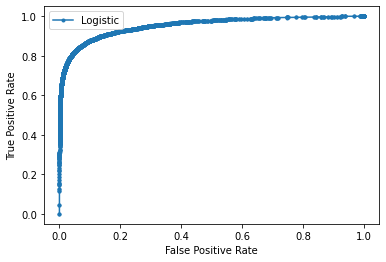

In [15]:
lr_auc = roc_auc_score(y_test1, predprobs)
# summarize scores

print('Random Trees: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(y_test1, predprobs)
# plot the roc curve for the model

pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# training model on entire training dataset

In [16]:
model = lgb.LGBMClassifier(objective = 'binary',
        boosting_type = 'gbdt',
        n_estimators = 5000,
        learning_rate = 0.02, 
        num_leaves = 50,
        min_data_in_leaf = 125, 
        bagging_fraction = 0.901,
        max_depth = 13, 
        reg_alpha = 2.5,
        reg_lambda = 2.5,
        min_split_gain = 0.0001,
        min_child_weight = 25,
        feature_fraction = 0.5, 
        silent = -1,
        verbose = -1,
        class_weight='balanced',
        n_jobs = -1)
model.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] bagging_fraction is set=0.901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.901


LGBMClassifier(bagging_fraction=0.901, class_weight='balanced',
               feature_fraction=0.5, learning_rate=0.02, max_depth=13,
               min_child_weight=25, min_data_in_leaf=125, min_split_gain=0.0001,
               n_estimators=5000, num_leaves=50, objective='binary',
               reg_alpha=2.5, reg_lambda=2.5, silent=-1, verbose=-1)

In [ ]:
#predicting output

In [17]:
predprobs = model.predict_proba(X_test)
predprobs = predprobs[:,1]

In [18]:
submission = pd.DataFrame({'TransactionID':k,'isFraud':predprobs})
submission.head()

,TransactionID,isFraud
0,2987000,0.020834
1,2987001,0.037599
2,2987004,0.006888
3,2987007,0.044247
4,2987009,0.002675


In [ ]:
#saving the predicted output to file

In [19]:
filename = 'new_sub1.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: new_sub1.csv


In [ ]:
## output --- roc curve on test data == 0.95944